<a href="https://colab.research.google.com/github/VitalyGladyshev/gb_nlp/blob/main/HW_04_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 04 NLP

В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

In [91]:
import numpy as np
import pandas as pd

In [92]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [130]:
path_nlp = "/content/gdrive/My Drive/Colab Notebooks/NLP/"

In [131]:
train_cor = pd.read_pickle(path_nlp + "train_cor.pkl")
test_cor = pd.read_pickle(path_nlp + "test_cor.pkl")

In [132]:
test_cor.tail(2)

,id,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
49157,49158,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...,"[happy, at, work, conference, right, mindset, ...","[happy, work, conference, right, mindset, lead...","{mindset, organ, lead, cultureofdevelop, right...","{mindset, lead, happy, right, cultureofdevelop..."
49158,49159,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze newmusi...,"[my, song, so, glad, free, download, shoegaze,...","[song, glad, free, download, shoegaze, newmusi...","{song, glad, newsong, newmus, free, shoegaz, d...","{newmusic, song, shoegaze, glad, newsong, free..."


In [133]:
test_cor['label'] = -1

In [134]:
data = train_cor.copy()
data = data.append(test_cor, ignore_index=True)
data.tail(2)

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
49157,49158,-1,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...,"[happy, at, work, conference, right, mindset, ...","[happy, work, conference, right, mindset, lead...","{mindset, organ, lead, cultureofdevelop, right...","{mindset, lead, happy, right, cultureofdevelop..."
49158,49159,-1,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze newmusi...,"[my, song, so, glad, free, download, shoegaze,...","[song, glad, free, download, shoegaze, newmusi...","{song, glad, newsong, newmus, free, shoegaz, d...","{newmusic, song, shoegaze, glad, newsong, free..."


In [135]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
count_vectorizer_stemmed = CountVectorizer(stop_words='english', max_df=0.9, max_features=1000)
count_vectorizer_lemmatized = CountVectorizer(stop_words='english', max_df=0.9, max_features=1000)

bag_of_words_stemmed = count_vectorizer_stemmed.fit_transform(list(map(lambda x: " ".join(x), data['tweet_stemmed'].values)))
bag_of_words_lemmatized = count_vectorizer_lemmatized.fit_transform(list(map(lambda x: " ".join(x), data['tweet_lemmatized'].values)))

df_count_vect_stemmed = pd.DataFrame(bag_of_words_stemmed.toarray(), columns=count_vectorizer_stemmed.get_feature_names())
df_count_vect_lemmatized = pd.DataFrame(bag_of_words_lemmatized.toarray(), columns=count_vectorizer_lemmatized.get_feature_names())
df_count_vect_lemmatized.head(2)

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,adventure,advice,affirmation,affirmations,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,alligator,allow,altwaystoheal,amaze,america,american,americans,amp,anger,angry,animals,anniversary,announce,answer,anxiety,anymore,app,...,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,wonderful,word,work,workout,world,worry,worse,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,yeah,year,years,yes,yesterday,yo,yoga,york,young,youtube,yr,yrs,yummy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
tfidf_vectorizer_stemmed = TfidfVectorizer(stop_words='english', max_df=0.9, max_features=1000)
tfidf_vectorizer_lemmatized = TfidfVectorizer(stop_words='english', max_df=0.9, max_features=1000)

tfidf_stemmed = tfidf_vectorizer_stemmed.fit_transform(list(map(lambda x: " ".join(x), data['tweet_stemmed'].values)))
tfidf_lemmatized = tfidf_vectorizer_lemmatized.fit_transform(list(map(lambda x: " ".join(x), data['tweet_lemmatized'].values)))

df_tfidf_vect_stemmed = pd.DataFrame(tfidf_stemmed.toarray(), columns=tfidf_vectorizer_stemmed.get_feature_names())
df_tfidf_vect_lemmatized = pd.DataFrame(tfidf_lemmatized.toarray(), columns=tfidf_vectorizer_lemmatized.get_feature_names())
df_tfidf_vect_lemmatized.head(2)

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,adventure,advice,affirmation,affirmations,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,alligator,allow,altwaystoheal,amaze,america,american,americans,amp,anger,angry,animals,anniversary,announce,answer,anxiety,anymore,app,...,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,wonderful,word,work,workout,world,worry,worse,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,yeah,year,years,yes,yesterday,yo,yoga,york,young,youtube,yr,yrs,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Задание 1

Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import scipy
from typing import Set

In [102]:
data.loc[data['label'] != -1, 'label'].values

array([0, 0, 0, ..., 0, 1, 0])

In [103]:
type(bag_of_words_stemmed)

scipy.sparse.csr.csr_matrix

In [137]:
def log_reg_model_f1_score(X: scipy.sparse.csr.csr_matrix, y: np.array) -> Set:
    train_x, valid_x, train_y, valid_y = train_test_split(X, 
                                                          y, 
                                                          stratify=y, 
                                                          random_state=43)

    model = LogisticRegression()

    model.fit(train_x, train_y)
        
    predictions = model.predict(valid_x)
    predictions_prb = model.predict_proba(valid_x)

    score = f1_score(valid_y, predictions)
    print(f"f1 score: {score:.4f}")

    pred = np.zeros(predictions_prb.shape[0])
    pred[predictions_prb[:, 1] >= 0.3] = 1
    pred = pred.astype(int)
    score = f1_score(valid_y, pred)
    print(f"f1 score порог 0.3: {score:.4f}")

    return predictions, predictions_prb, pred

In [105]:
pred_bw_st, pred_bw_st_prb, pred_bw_st_prb_03 = log_reg_model_f1_score(bag_of_words_stemmed[:31962], train_cor['label'].values)

f1 score: 0.5365
f1 score порог 0.3: 0.5787


In [106]:
pred_bw_lm, pred_bw_lm_prb, pred_bw_lm_prb_03 = log_reg_model_f1_score(bag_of_words_lemmatized[:31962], train_cor['label'].values)

f1 score: 0.5085
f1 score порог 0.3: 0.5647


## Задание 2

Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [107]:
pred_tf_st, pred_tf_st_prb, pred_tf_st_prb_03 = log_reg_model_f1_score(tfidf_stemmed[:31962], train_cor['label'].values)

f1 score: 0.5168
f1 score порог 0.3: 0.5774


In [108]:
pred_tf_lm, pred_tf_lm_prb, pred_tf_lm_prb_03 = log_reg_model_f1_score(tfidf_lemmatized[:31962], train_cor['label'].values)

f1 score: 0.4898
f1 score порог 0.3: 0.5607


## Задание 3

Выведите результаты f1-score всех моделей, сделайте вывод.

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [110]:
X = tfidf_lemmatized[:31962]
y = train_cor['label'].values

train_x, valid_x, train_y, valid_y = train_test_split(X, 
                                                      y, 
                                                      stratify=y, 
                                                      random_state=43)

In [111]:
def metrics_view(y_valid: np.ndarray, y_pred: np.ndarray):
    print(f"confusion_matrix: \n{confusion_matrix(y_valid, y_pred)}\n")
    print(f"precision:\t{precision_score(y_valid, y_pred):.4f}")
    print(f"recall:\t\t{recall_score(y_valid, y_pred):.4f}")
    print(f"roc auc:\t{roc_auc_score(y_valid, y_pred):.4f}")
    print(f"f1:\t\t{f1_score(y_valid, y_pred):.4f}")

In [112]:
metrics_view(valid_y, pred_bw_st)

confusion_matrix: 
[[7380   50]
 [ 337  224]]

precision:	0.8175
recall:		0.3993
roc auc:	0.6963
f1:		0.5365


In [113]:
metrics_view(valid_y, pred_bw_st_prb_03)

confusion_matrix: 
[[7269  161]
 [ 267  294]]

precision:	0.6462
recall:		0.5241
roc auc:	0.7512
f1:		0.5787


In [114]:
metrics_view(valid_y, pred_bw_lm_prb_03)

confusion_matrix: 
[[7292  138]
 [ 286  275]]

precision:	0.6659
recall:		0.4902
roc auc:	0.7358
f1:		0.5647


In [115]:
metrics_view(valid_y, pred_tf_st_prb_03)

confusion_matrix: 
[[7306  124]
 [ 283  278]]

precision:	0.6915
recall:		0.4955
roc auc:	0.7394
f1:		0.5774


In [138]:
metrics_view(valid_y, pred_tf_lm_prb_03)

confusion_matrix: 
[[7321  109]
 [ 300  261]]

precision:	0.7054
recall:		0.4652
roc auc:	0.7253
f1:		0.5607


## Выводы

Все построенные модели характеризуются низкими значниями precision и recall - дают много ложно положительных и ложно отрицательных значений и соответственно низкое значение целевой метрики f1

## Задание 4

Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

In [139]:
# %pip install wordcloud

In [140]:
import nltk

In [141]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [142]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import collections

In [144]:
stopwords

<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>

In [145]:
stop_words = set(stopwords.words('english'))

In [154]:
s_words = set(STOPWORDS)

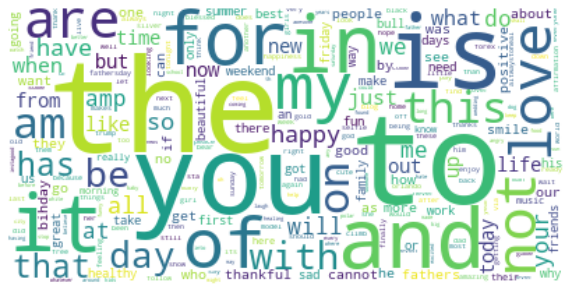

In [158]:
words = []
for line in data['clean_tweet']: 
    line_words = line.split()
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [160]:
# wordfreq

## Не удалось изжить stopwords :(

## Меняем источник

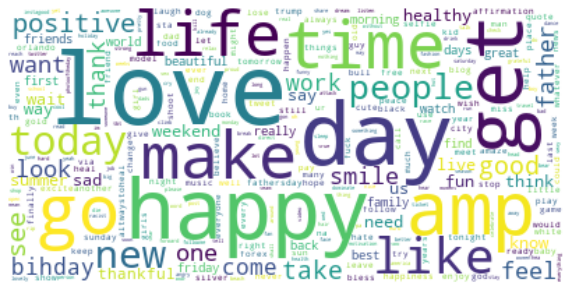

In [129]:
words = []
for line in data['tweet_lemmatized']: 
    for word in line:
        words.append(word)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Задание 5

Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0).

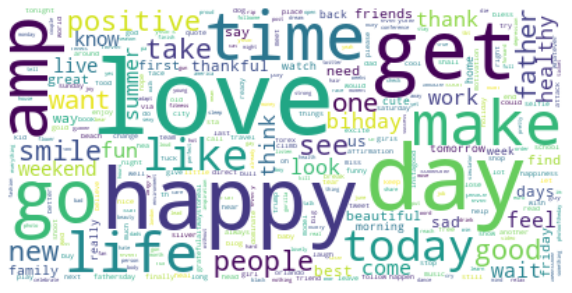

In [164]:
words = []
for line in data.loc[data['label'] == 0, 'tweet_lemmatized']: 
    for word in line:
        words.append(word)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Задание 6

Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 

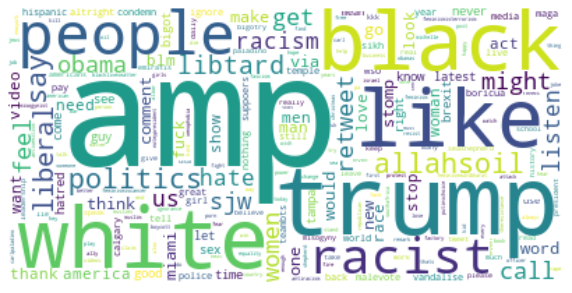

In [165]:
words = []
for line in data.loc[data['label'] == 1, 'tweet_lemmatized']: 
    for word in line:
        words.append(word)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
t